<a href="https://colab.research.google.com/github/MagicMoleMM/ML/blob/main/TF_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.python.keras.layers import Conv2D

In [2]:
signal = np.array([[3,3,2,1,0],
                   [0,0,1,3,1],
                   [3,1,2,2,3],
                   [2,0,0,2,2],
                   [2,0,0,0,1]])

conv_layer = Conv2D(kernel_size=(3,3), filters=1, use_bias=False)


In [3]:
signal = signal.reshape(1,5,5,1).astype(np.float32)
signal.shape

(1, 5, 5, 1)

In [4]:
output = conv_layer(signal)
output

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[ 0.30986345],
         [ 1.635396  ],
         [ 3.643765  ]],

        [[ 2.4347258 ],
         [ 2.3628328 ],
         [ 3.7347357 ]],

        [[-0.26878458],
         [-0.21331781],
         [ 0.6433493 ]]]], dtype=float32)>

In [5]:
conv_layer.get_weights()[0].shape

(3, 3, 1, 1)

In [6]:
from tensorflow.python.ops.numpy_ops import float32
kernel = np.array([[0,1,2],
                   [2,2,0],
                   [0,1,2]])
kernel = kernel.reshape(3,3,1,1).astype(float32)

In [7]:
conv_layer.set_weights([kernel])
conv_layer(signal)

<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
array([[[[12.],
         [12.],
         [17.]],

        [[10.],
         [17.],
         [19.]],

        [[ 9.],
         [ 6.],
         [14.]]]], dtype=float32)>

In [9]:
from skimage import data
import matplotlib.pyplot as plt


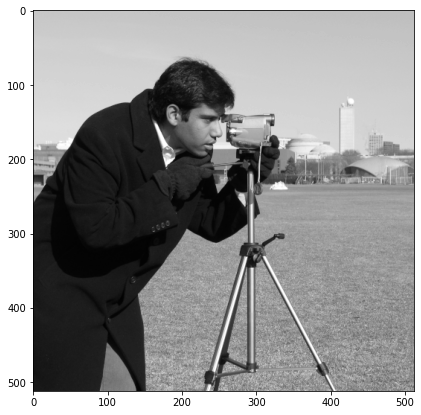

In [52]:
image = data.camera()
plt.figure(figsize=(7,7))
plt.imshow(image, cmap='gray')

In [53]:
image = image.astype(np.float32) / 255.
image = image[None, ... , None]
image.shape

(1, 512, 512, 1)

In [54]:
conv_layer = Conv2D(kernel_size=(7,7), filters=1, use_bias=False)
_ = conv_layer(image)

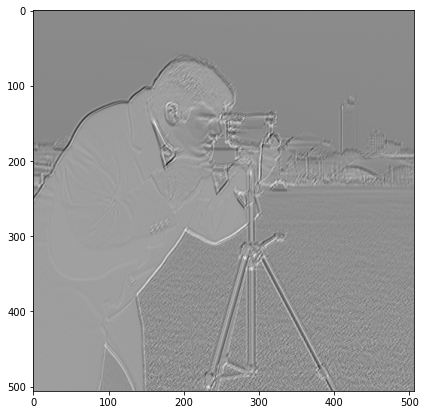

In [55]:
#kernel = np.ones((7,7,1,1)) *1./49
#conv_layer.set_weights([kernel])

blur_image = conv_layer(image)
plt.figure(figsize=(7,7))
plt.imshow(blur_image[0,:,:,0], cmap='gray')

In [56]:
image.shape, blur_image.shape

((1, 512, 512, 1), TensorShape([1, 506, 506, 1]))